In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Generating Random Data Set For model

In [2]:
X = np.vstack([(np.random.rand(10, 2)*5),(np.random.rand(10, 2)*10)])
Y = np.hstack([[0]*10 , [1]*10])
dataset = pd.DataFrame(X,columns={"X1","X2"})
dataset["Y"] =Y

# Random DataSet Generated

In [3]:
dataset.head()

,X1,X2,Y
0,3.596683,2.528780,0
1,1.375634,1.299973,0
2,2.569377,1.768548,0
3,2.374849,3.473490,0
4,4.271004,4.970541,0


# Ploting dataset values 

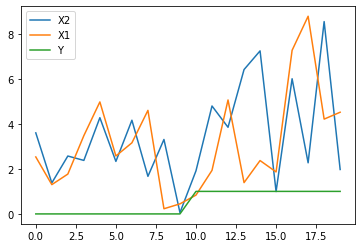

In [4]:
plt.plot(dataset,label='Inline label')
plt.legend(["X2","X1","Y"])

# Converting Target variable to vector of number of classes

In [5]:
Z = np.zeros((20, 2))
for i in range(20):
    Z[i, Y[i]] = 1

In [6]:
X.shape

(20, 2)

# Initiating Random Weights and Bias

In [7]:
Wi_1 = np.random.randn(3, 2)
Bi_1 = np.random.randn(3)
Wi_2 = np.random.randn(2, 3)
Bi_2 = np.random.randn(2)

In [8]:
Wi_1

array([[-1.56462436, -0.05221165],
       [ 1.58601077,  0.13369813],
       [-1.13341516, -0.38220891]])

In [19]:
Bi_2

array([0.41607498, 1.23941914])

In [10]:
Wi_2

array([[ 0.19812185, -0.06233041,  1.22597364],
       [-0.00875469, -1.52851499, -2.30988988]])

In [11]:
Bi_2

array([ 1.91687084, -0.26137672])

# Defining the Forward Propagation function 

In [12]:
def forward_prop(X, Wi_1, Bi_1, Wi_2, Bi_2):
    M = 1 / (1 + np.exp(-(X.dot(Wi_1.T) + Bi_1)))
    A = M.dot(Wi_2.T) + Bi_2
    expA = np.exp(A)
    Y = expA / expA.sum(axis=1, keepdims=True)
    return Y, M

In [13]:
M = 1 / (1 + np.exp(-(X.dot(Wi_1.T) + Bi_1)))
A = M.dot(Wi_2.T) + Bi_2

# Backpropagation by Differentiating or Gradient Descent

In [14]:
#Returns gradient for Weight_2
def diff_Wi_2(H, Z, Y):
    return H.T.dot(Z - Y)

In [15]:
#Returns gradient for Weight_2
def diff_Wi_1(X, H, Z, output, Wi_2):
    dZ = (Z - output).dot(Wi_2) * H * (1 - H)
    return X.T.dot(dZ)


In [16]:
# Returns derivative for both bias
def diff_B2(Z, Y):
    return (Z - Y).sum(axis=0)

def diff_B1(Z, Y, Wi_2, H):
    return ((Z - Y).dot(Wi_2) * H * (1 - H)).sum(axis=0)

In [20]:
learning_rate = 1e-3
for epoch in range(5000):
    output, hidden = forward_prop(X, Wi_1, Bi_1, Wi_2, Bi_2)
    Wi_2 += learning_rate * diff_Wi_2(hidden, Z, output).T
    Bi_2 += learning_rate * diff_B2(Z, output)
    Wi_1 += learning_rate * diff_Wi_1(X, hidden, Z, output, Wi_2).T
    Bi_1 += learning_rate * diff_B1(Z, output, Wi_2, hidden)

# Generating Prediction at New Datapoint

In [25]:
X_test =np.array([1,1])

hidden_output = 1 / (1 + np.exp(-X_test.dot(Wi_1.T) - Bi_1))
Outer_layer_output = hidden_output.dot(Wi_2.T) + Bi_2
expA = np.exp(Outer_layer_output)
Y = expA / expA.sum()
print(" prob of class 0>>>>>>  {} \n prob of class 1 >>>>> {}".format(Y[0],Y[1]))

 prob of class 0>>>>>>  0.7991464774581799 
 prob of class 1 >>>>> 0.20085352254182
